In [1]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import folium
import shapely
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from shapely.geometry import MultiPolygon, Polygon
import plotly.plotly as py_cloud
import plotly.offline as py
import pandas as pd
import colorlover as cl
import numpy as np
from shapely.ops import cascaded_union
%matplotlib inline

In [2]:
###
fname = 'C:\\users\\nosok\\desktop\\RUS_adm\\RUS_adm3.shp'
###
df1 = gpd.GeoDataFrame.from_file(fname)
df = df1[df1.NAME_1.str.strip()=='Yamal-Nenets']

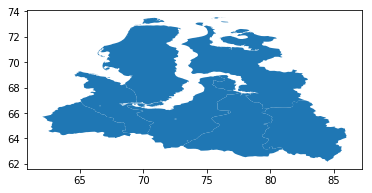

In [5]:
df.geometry.plot()

In [2]:
layout = dict(
    hovermode = 'closest',
    xaxis = dict(
        autorange = False,
        range = [0, 180],
        showgrid = False,
        zeroline = False,
        fixedrange = True
    ),
    yaxis = dict(
        autorange = False,
        range = [40, 80],
        showgrid = False,
        zeroline = False,
        fixedrange = False
    ),
    margin = dict(
        t=20,
        b=20,
        r=20,
        l=20
    ),
    width = 1400,
    height = 650,
    dragmode = 'select'
)

In [15]:
plot_data = []
for index, row in df.iterrows():
    if df['geometry'][index].type == 'Polygon':
        x, y = row.geometry.exterior.xy
        c_x, c_y = row.geometry.centroid.xy
    elif df['geometry'][index].type == 'MultiPolygon':
        poly = row.geometry
        x, y = [], []
        c_x, c_y = [], []
        for p in poly:
            _x, _y = p.exterior.xy
            x.append(_x), y.append(_y)
            _c_x, _c_y = p.centroid.xy
            c_x.append(_c_x), c_y.append(_c_y) 
    else: 
        print('stop')
        
    outline = dict(
            type = 'scatter',
            showlegend = False,
            legendgroup = "shapes",
            line = dict(color='black', width=1),
            x = np.asarray(x),
            y = np.asarray(y),
            fill = 'toself',
            fillcolor = 'purple',
            hoverinfo = 'none'
        )
    plot_data.append(outline)

In [16]:
fig = dict(data=plot_data, layout=layout)
py.plot(fig, filename='Yamal.html')

'file://C:\\Users\\nosok\\Yamal.html'